L1 and L2 and Dropout Regularization: 

In [2]:
initializer = keras.regularizers.l1(0.01)

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation = "relu",),
keras.layers.Dense(400, activation = "relu", kernel_regularizer='l2')
keras.layers.Dense(100, activation = "relu", kernel_regularizer = initializer),
                                                                  keras.regularizers.l1_l2(l1=0.01, l2=0.01)
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(10, activation = "softmax")
])


# layer ko parameter maa kernel_regularizer vanni parameter rakhera L1 or L2 regulariztion pani use garna sakinxa

 ## for eg - 
  
  ####   keras.layers.Dense(64, activation="relu", kernel_regularizer="l1")

 ####     keras.layers.Dense(64, activation="relu", kernel_regularizer="l2")
         
# Another method :-

### Yesma chai initializer maa regularization assign garni ani paxi layer ko description maa gayera tyo initializer use garda pani hunxa . 

### For eg:-
####  initializer = keras.regularizers.l1(0.01)

####  model = keras.models.Sequential([
####  keras.layers.Flatten(input_shape=[28,28]),
####  keras.layers.Dense(300, activation = "relu",),
 #### keras.layers.Dense(400, activation = "relu", kernel_regularizer='l2')
#### keras.layers.Dense(100, activation = "relu", kernel_regularizer = initializer)

# Hamle l1 ra l2 regularization ekkai choti pani use garna sakinxa lets see the following examplen as:-

#### keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01))
 
 ### ani tyo 0.1 le chai alpha value denote garxa i.e strength of regularization penalty ani tyo value 0(no penalty) to 1(full penalty) hunxa 


# Dropout Regularization :-
# ---> hamle dropout regualarization use garda ,jun layer maa use garni ho tyo layer add garera tes paxi chai dropout rate specify matrai garda hunxa

### For eg:-

#### model = keras.Sequential([
####    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
 ####   keras.layers.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5 (50% dropout)
   #### keras.layers.Dense(64, activation='relu'),
####   keras.layers.Dropout(0.5),
 ####   keras.layers.Dense(10, activation='softmax')
#### ])

# Data augmentation :

 ### ---> hamlai model train garda alik dherai data chaiyo vane, hami sanga pailei vayeko data lai rotete, crop, blur , color ko contrast haru thap ghat garera naye data haru nikalna sakinxa , teslai nai data augmentation vaninxa.
 
#### ---> Data augmentation is a technique used to artificially increase the size and diversity of a training dataset by applying various transformations or modifications to the existing data. These transformations can include:
   
 Rotation: Rotating images by a certain angle (e.g., 90 degrees) to create new variations.

 Reflection: Flipping images horizontally or vertically to generate mirrored versions.

 Cropping: Cropping images to different regions or sizes, simulating variations in object positioning.

 Changing Color Contrast: Adjusting the brightness, contrast, and color balance of images to create different lighting conditions.

 Scaling: Resizing images to different dimensions.

Translation: Shifting images horizontally or vertically to simulate changes in viewpoint.

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [3]:

mnist = keras.datasets.cifar10
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()


In [4]:
# https://keras.io/api/layers/preprocessing_layers/

data_augmentation = keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

# existing ddata lai flip /rotaate garera new data banako


2023-09-18 11:37:45.993163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 11:37:46.192450: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
X_train_full = X_train_full / 255.0

In [9]:

image=X_train_full[12]


In [10]:

image = tf.expand_dims(image, 0)


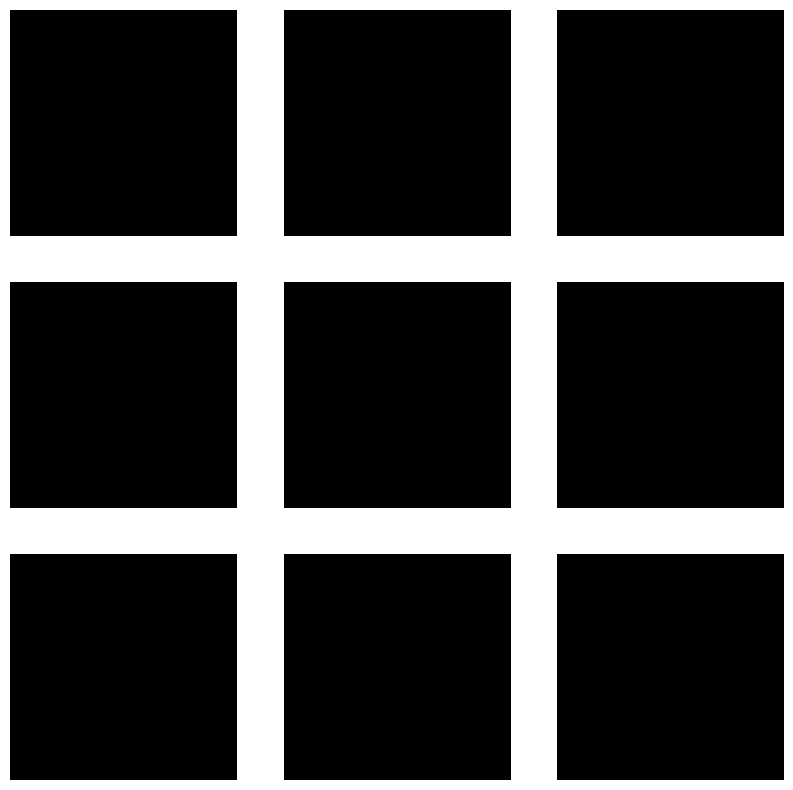

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [7]:

model = keras.models.Sequential([
  data_augmentation,
  # Rest of your model...
])


In [8]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    
image=X_train_full[12]


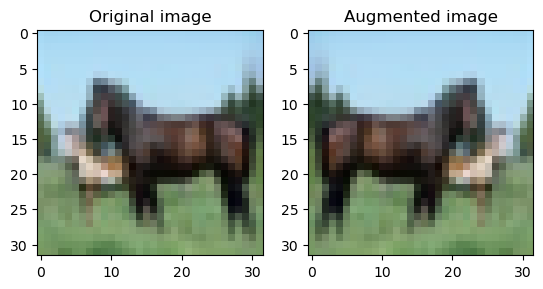

In [9]:

flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

# yesari image flip pani garna sakinxa

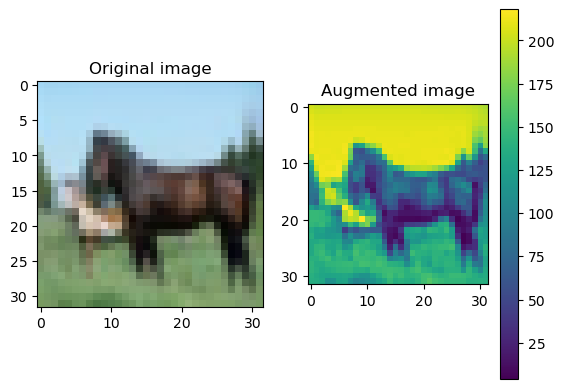

In [10]:

grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

# yesari hamle image data ko color grading change garera data badhauna sakinxa

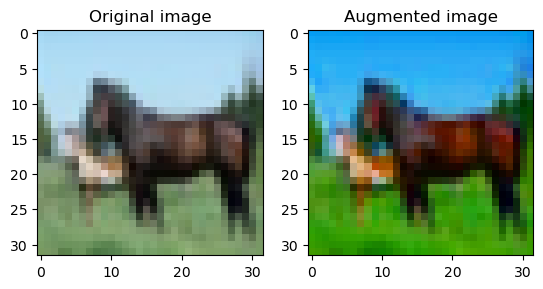

In [11]:

saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

# image ko saturation ghatauna / badhauna sakinxa


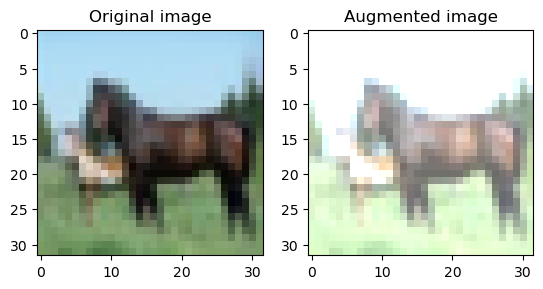

In [12]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

# image ko brightness thap ghat garera new data produce garna sakinxa


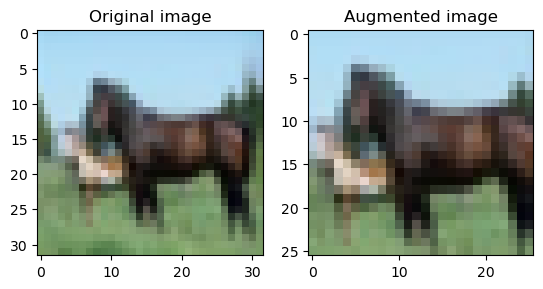

In [13]:
cropped = tf.image.central_crop(image, central_fraction=0.8)
visualize(image,cropped)

# real image crop garera new data banauna sakinxa

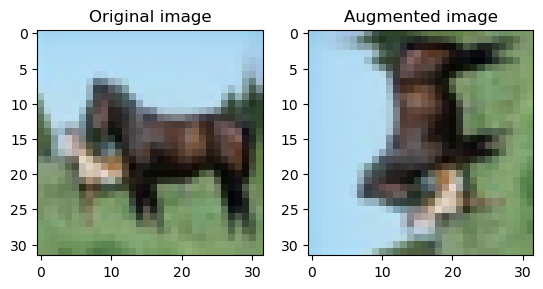

In [14]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

# image rotate gaarna pani sakinxa


In [15]:

# https://www.tensorflow.org/tutorials/images/data_augmentation

# You can go through this link to get more information about data augmentation in tensorflow.
